In [ ]:
import h5py
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import glob
from skimage.feature import hog
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from skimage.feature import local_binary_pattern
from sklearn.model_selection import GridSearchCV

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
bus_images = []
for img in os.listdir("/content/drive/MyDrive/Training_set/electric bus"):
      img_array = cv2.imread(os.path.join("/content/drive/MyDrive/Training_set/electric bus",img))
      img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
      bus_images.append(img_array)
for i in range(len(bus_images)):
  bus_images[i]=cv2.resize(bus_images[i],(256,256))

array([[[149, 177, 155],
        [132, 160, 138],
        [ 85, 113,  90],
        ...,
        [191, 162, 144],
        [187, 158, 140],
        [185, 156, 138]],

       [[165, 193, 172],
        [121, 149, 127],
        [ 78, 105,  85],
        ...,
        [207, 180, 164],
        [204, 177, 161],
        [202, 175, 159]],

       [[141, 169, 150],
        [104, 131, 111],
        [ 76, 103,  85],
        ...,
        [226, 204, 191],
        [217, 194, 181],
        [208, 185, 172]],

       ...,

       [[ 39,  42,  40],
        [ 42,  45,  42],
        [ 41,  44,  42],
        ...,
        [211, 208, 193],
        [211, 208, 194],
        [211, 208, 193]],

       [[ 37,  41,  41],
        [ 41,  46,  46],
        [ 42,  46,  45],
        ...,
        [210, 207, 192],
        [210, 207, 192],
        [209, 206, 191]],

       [[ 36,  42,  42],
        [ 41,  47,  47],
        [ 42,  46,  45],
        ...,
        [210, 207, 192],
        [210, 207, 192],
        [209, 206, 191]]], dtype=uint8)
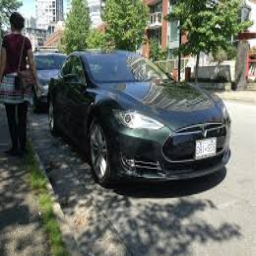

In [ ]:
car_images = []
for img in os.listdir("/content/drive/MyDrive/Training_set/electric car"):
      img_array = cv2.imread(os.path.join("/content/drive/MyDrive/Training_set/electric car",img))
      img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
      car_images.append(img_array)
for i in range(len(car_images)):
  car_images[i]=cv2.resize(car_images[i],(256,256))

car_images[56]

array([[[119, 164,  83],
        [119, 164,  82],
        [117, 162,  79],
        ...,
        [ 37,  53,  37],
        [ 53,  70,  52],
        [ 63,  82,  62]],

       [[ 99, 143,  63],
        [100, 145,  63],
        [100, 145,  63],
        ...,
        [ 17,  32,  17],
        [ 28,  46,  26],
        [ 42,  61,  40]],

       [[ 80, 124,  45],
        [ 81, 126,  45],
        [ 82, 127,  46],
        ...,
        [  2,  17,   0],
        [ 14,  32,  10],
        [ 35,  55,  31]],

       ...,

       [[201, 191, 181],
        [201, 191, 181],
        [201, 191, 181],
        ...,
        [190, 176, 167],
        [190, 176, 167],
        [190, 176, 167]],

       [[202, 192, 182],
        [202, 192, 182],
        [202, 192, 182],
        ...,
        [188, 175, 166],
        [194, 180, 171],
        [193, 179, 170]],

       [[203, 193, 184],
        [203, 193, 184],
        [203, 193, 184],
        ...,
        [187, 174, 165],
        [198, 185, 176],
        [196, 183, 174]]], dtype=uint8)
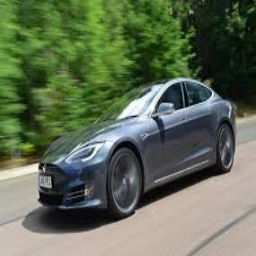

In [ ]:
car_images[0]

array([[[220, 227, 245],
        [215, 222, 240],
        [216, 223, 241],
        ...,
        [211, 227, 243],
        [211, 227, 243],
        [215, 231, 247]],

       [[217, 224, 242],
        [213, 220, 238],
        [213, 220, 238],
        ...,
        [209, 223, 240],
        [209, 223, 240],
        [213, 228, 244]],

       [[214, 221, 239],
        [210, 217, 235],
        [210, 217, 236],
        ...,
        [208, 222, 236],
        [208, 221, 236],
        [213, 226, 241]],

       ...,

       [[103, 102, 107],
        [ 97,  96, 101],
        [ 97,  96, 101],
        ...,
        [ 90,  93, 108],
        [ 90,  93, 108],
        [ 92,  95, 110]],

       [[108, 107, 112],
        [102, 101, 106],
        [102, 101, 106],
        ...,
        [ 90,  93, 108],
        [ 90,  93, 108],
        [ 97, 100, 115]],

       [[112, 111, 116],
        [105, 104, 109],
        [104, 103, 108],
        ...,
        [ 90,  93, 108],
        [ 90,  93, 108],
        [101, 104, 119]]], dtype=uint8)
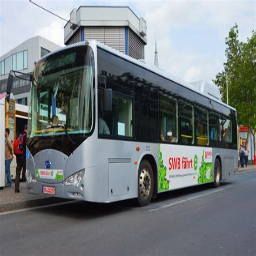

In [ ]:
bus_images[0]

In [ ]:
input_images = np.zeros((1486, 256, 256, 3), dtype=np.uint8)
input_images[:len(car_images)] = car_images
input_images[len(car_images):] = bus_images

Y = np.hstack((np.ones(len(car_images)), np.zeros(len(bus_images))))
input_images.shape

(1486, 256, 256, 3)

array([[[211, 243, 255],
        [207, 239, 255],
        [207, 238, 255],
        ...,
        [211, 243, 255],
        [211, 243, 255],
        [214, 246, 255]],

       [[210, 241, 255],
        [206, 237, 255],
        [206, 237, 255],
        ...,
        [208, 240, 255],
        [208, 240, 255],
        [213, 245, 255]],

       [[208, 239, 255],
        [204, 235, 255],
        [204, 235, 255],
        ...,
        [205, 237, 252],
        [205, 237, 252],
        [208, 240, 253]],

       ...,

       [[164, 172, 175],
        [159, 164, 167],
        [167, 166, 171],
        ...,
        [204, 204, 206],
        [219, 219, 221],
        [209, 209, 211]],

       [[172, 181, 183],
        [162, 167, 170],
        [166, 165, 170],
        ...,
        [214, 214, 216],
        [215, 215, 217],
        [217, 217, 220]],

       [[179, 184, 187],
        [163, 166, 168],
        [163, 162, 165],
        ...,
        [228, 228, 230],
        [225, 225, 227],
        [220, 220, 222]]], dtype=uint8)
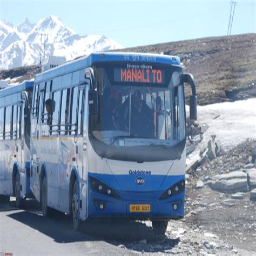

In [ ]:
input_images[800]

In [ ]:
from skimage.color import rgb2gray
# Extract Features(histogram,hog,binning) from the entire dataset
features = []
for idx,image in enumerate(input_images):
          image = rgb2gray(image)
          fd, hog_image = hog(image, orientations=9, pixels_per_cell=(8, 8),
                	cells_per_block=(2, 2), visualize=True)
          features.append(fd)

In [ ]:
len(features)

1486

In [ ]:
import h5py
filename = "/content/drive/My Drive/only_hog.h5"
with h5py.File(filename, "w") as f:
    # Create datasets in the HDF5 file and store the data
    f.create_dataset("features", data=features)
    f.create_dataset("labels", data=Y)

In [ ]:
with h5py.File('/content/drive/MyDrive/only_hog.h5', 'r') as f:
    #load features from file h5
    X_scaler = StandardScaler().fit(f["features"][...])
    scaled_X = X_scaler.transform(f["features"][...])
    X_train, X_test, Y_train, Y_test = train_test_split(
        scaled_X,
        Y,
        test_size=0.2,
        random_state=0,
    )
    svc = LinearSVC()
    svc.fit(X_train, Y_train)
    print('Test Accuracy of SVC = ', round(svc.score(X_test, Y_test), 4)*100)

Test Accuracy of SVC =  89.25999999999999


In [ ]:
def compute_lbp_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Compute LBP features
    lbp_radius = 3
    lbp_points = 8 * lbp_radius
    lbp = local_binary_pattern(gray, lbp_points, lbp_radius, method='uniform')
    lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, lbp_points + 3), range=(0, lbp_points + 2))
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-7)
    return lbp_hist




def color_hist(image, nbins=600, bins_range=(0, 256)):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    channel1_hist = np.histogram(image[:,:,0], bins=nbins, range=bins_range)#hue
    channel2_hist = np.histogram(image[:,:,1], bins=nbins, range=bins_range)#saturation
    channel3_hist = np.histogram(image[:,:,2], bins=nbins, range=bins_range)#contrast
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    return hist_features


def bin_spatial(image, size=(16, 16)):
    # image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
    return cv2.resize(image, size).ravel()

In [ ]:
conc_features = []
for idx,image in enumerate(input_images):
    # print (f"working on image {idx+1}/{len(images)}")
    file_features = []
    spatial_features = bin_spatial(image)
    file_features.append(spatial_features)
    lbp_features = compute_lbp_features(image)
    file_features.append(lbp_features)
    hist_features = color_hist(image)
    file_features.append(hist_features)
    file_features.append(features[idx])
    conc_features.append(np.concatenate(file_features))



In [ ]:
import h5py
filename = "/content/drive/My Drive/combined.h5"
with h5py.File(filename, "w") as f:
    # Create datasets in the HDF5 file and store the data
    f.create_dataset("features", data=conc_features)
    f.create_dataset("labels", data=Y)

In [ ]:
with h5py.File('/content/drive/MyDrive/combined.h5', 'r') as f:
    #load features from file h5
    X_scaler = StandardScaler().fit(f["features"][...])
    scaled_X = X_scaler.transform(f["features"][...])
    X_train, X_test, Y_train, Y_test = train_test_split(
        scaled_X,
        Y,
        test_size=0.2,
        random_state=0,
    )
    svc = LinearSVC()
    svc.fit(X_train, Y_train)
    print('Test Accuracy of SVC = ', round(svc.score(X_test, Y_test), 4)*100)

Test Accuracy of SVC =  91.61


In [ ]:
# #reading g5 file
# with h5py.File('/content/drive/MyDrive/combined.h5', 'r') as f:
#   X_scaler = StandardScaler().fit(f["features"][...])
#   scaled_X = X_scaler.transform(f["features"][...])
#   X_train, X_test, Y_train, Y_test = train_test_split(
#       scaled_X,
#       Y,
#       test_size=0.2,
#       random_state=0,)

# # Define the parameter grid to search
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10],
#     'loss': ['hinge', 'squared_hinge']
# }

# # Initialize LinearSVC
# svc = LinearSVC()

# # Grid search with cross-validation
# grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
# grid_search.fit(X_train, Y_train)

# # Print best parameters and best score
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Accuracy: ", grid_search.best_score_)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# with h5py.File('/content/drive/MyDrive/combined.h5', 'r') as f:
#     # Load features from file h5
#     X_scaler = StandardScaler().fit(f["features"][...])
#     scaled_X = X_scaler.transform(f["features"][...])
#     X_train, X_test, Y_train, Y_test = train_test_split(
#         scaled_X,
#         Y,
#         test_size=0.2,
#         random_state=0,
#     )
#     # Initialize and train the Random Forest classifier
#     rf = RandomForestClassifier()
#     rf.fit(X_train, Y_train)
#     # Print the test accuracy of the Random Forest classifier
#     print('Test Accuracy of Random Forest Classifier = ', round(rf.score(X_test, Y_test), 4)*100)


In [ ]:
import pickle
file_name = "CarBusModel.pkl"
with open(file_name, 'wb') as file:
    pickle.dump(svc, file)

print(f"Model saved to {file_name}")

Model saved to CarBusModel.pkl


In [ ]:
def inference(img_path):
 conc_features= []
 file_features = []
 inf = cv2.imread(img_path)
 inf = cv2.cvtColor(inf, cv2.COLOR_BGR2RGB)
 inf = cv2.resize(inf, (256, 256))
 hog_image = rgb2gray(inf)

 fd, im = hog(hog_image, orientations=9, pixels_per_cell=(8, 8),
							cells_per_block=(2, 2), visualize=True)

 file_features = []
 spatial_features = bin_spatial(inf)
 file_features.append(spatial_features)
 lbp_features = compute_lbp_features(inf)
 file_features.append(lbp_features)
 hist_features = color_hist(inf)
 file_features.append(hist_features)
 file_features.append(features[idx])
 conc_features.append(np.concatenate(file_features))

 with open(file_name, 'rb') as file:
   loaded_model = pickle.load(file)

 # Use the loaded model to make predictions
 predictions = []
 predictions = loaded_model.predict(conc_features)
 pred =  int(predictions[0])

 if pred == 1 :
   print("car")
 elif pred == 0:
   print("bus")

In [ ]:
inference("/content/download (1).jpeg")

car


In [ ]:
def inference(img_path):
 conc_features= []
 file_features = []
 inf = cv2.imread(img_path)
 inf = cv2.cvtColor(inf, cv2.COLOR_BGR2RGB)
 inf = cv2.resize(inf, (256, 256))
 hog_image = rgb2gray(inf)

 fd, im = hog(hog_image, orientations=9, pixels_per_cell=(8, 8),
							cells_per_block=(2, 2), visualize=True)

 file_features = []
 spatial_features = bin_spatial(inf)
 file_features.append(spatial_features)
 lbp_features = compute_lbp_features(inf)
 file_features.append(lbp_features)
 hist_features = color_hist(inf)
 file_features.append(hist_features)
 file_features.append(fd)
 conc_features.append(np.concatenate(file_features))

 with open(file_name, 'rb') as file:
   loaded_model = pickle.load(file)

 # Use the loaded model to make predictions
 predictions = []
 predictions = loaded_model.predict(conc_features)
 pred =  int(predictions[0])

 if pred == 1 :
   print("car")
 elif pred == 0:
   print("bus")

In [ ]:
inference("/content/download.jpeg")

bus
